## Context about the Problem

*Business problem*: A bank is losing money due to high default rate on its loans. When a customer's loan application has been approved but the customer is subsequently unable to re-pay his/her loan (via monthly payments), we say s/he has defaulted. How can the bank reduce its losses/increase its profits?

*Available data*: records of previously approved bank loans; some of them defaulted, some didn't. It is reasonable to assume that the records are independent (belong to unrelated people). 
Objective of data mining project: based on the available data, we will extract a pattern that can predict whether a person will have financial problems in the future that will prevent him/her from paying their loan. Specifically, we will build a classification model. This model will help solve the business problem because it will identify "bad" customers in advance and prevent approving their loan application.

*Data Understanding*: the data consists of **65,000** previously approved bank loan applications stored in a CSV file. Each application is described by the following **15 attributes** :

1. **defaulted**: whether the borrower is more than 90 days late, after 2 years of the loan.  This is the target variable.
2. **ID**: Applicant's unique identifier at this bank
3. **gender**: whether the applicant is male or female
4. **marital_status**: whether the applicant single, married, divorced, or widowed.
5. **age_group**: young, middle_aged, senior_citizen
6. **age**: applicant's age in number of years.
7. **nb_dependents**: Number of family members – people who “depend” on the applicant (spouse, children, parents, etc.)
8. **monthly_income**: person's monthly income from various sources (job salary, independent business, etc.)
9. **debt_ratio**: total monthly bills divided by monthly income.
10. **credit_card_balance_ratio**: Total credit card debt divided by credit limit.
11. **nb_open_loans**: Total number of open loans (e.g. car loan, house loan) and credit cards.
12. **nb_special_loans**: Number of mortgage and real estate loans ...
13. **nb_late_payments_1month**: Number of times the borrower was one month late in making monthly payment during the last 2 years.
14. **nb_late_payments_2months**: Number of times the borrower was late by 2-3 months in making monthly payment during the last 2 years.
15. **nb_late_payments_3+months**: Number of times the borrower was more than 3 months late in making monthly payment during the last 2 years.



In [90]:
# import Python libraries we will need later

import pandas as pd   
import numpy as np    

## 1. Exploring the data


In [91]:
# Change filepath if it is different on your computer
filepath = "bankloans-data-45K.csv"
df = pd.read_csv(filepath)
df.shape

(45000, 15)

In [92]:
# display first few rows in this DataFrame
df.head()

,ID,age,age_group,credit_card_balance_ratio,debt_ratio,defaulted,gender,marital_status,monthly_income,nb_dependents,nb_late_payments_1month,nb_late_payments_2months,nb_late_payments_3+months,nb_open_loans,nb_special_loans
0,7763927,43,middle_aged,0.011639,0.053386,1,Male,married,3558.0,2.0,0,0,0,5,0
1,5620181,32,young,0.031554,0.032146,0,Female,single,6625.0,0.0,0,0,0,3,0
2,6651247,82,senior,1.000000,1.000000,0,Male,divorced,NaN,0.0,0,0,0,4,0
3,5222993,29,young,0.006666,4.000000,0,Male,married,NaN,0.0,0,0,0,2,0
4,5450664,31,young,0.097509,68.000000,0,Female,married,NaN,0.0,0,0,0,7,0


In [93]:
# get list of column names
df.columns

Index(['ID', 'age', 'age_group', 'credit_card_balance_ratio', 'debt_ratio',
       'defaulted', 'gender', 'marital_status', 'monthly_income',
       'nb_dependents', 'nb_late_payments_1month', 'nb_late_payments_2months',
       'nb_late_payments_3+months', 'nb_open_loans', 'nb_special_loans'],
      dtype='object')

In [94]:
# dispay first few values of a particular column  -- notice the CHAINING of function calls
df['debt_ratio'].head()
df.debt_ratio.head()

0     0.053386
1     0.032146
2     1.000000
3     4.000000
4    68.000000
Name: debt_ratio, dtype: float64

In [95]:
# select rows that satisfy a logical condition
mask = (df.monthly_income > 5000) & (df.defaulted == 1)
df3 = df[mask]
df3.shape

(1014, 15)

In [96]:
# Invalid Values
df.nb_late_payments_1month.unique()
# Clearly the values 98 and 96 are absurd and probably missing values because this column represents 
# the Number of times the borrower was one month late in making monthly payment during the last 2 years. 
# So this value can't be greater than 12

array([ 0,  1,  2,  3,  5,  4,  6, 98,  7,  8,  9, 10, 96, 12])

In [97]:
# statisical summaries of ALL numeric columns in the DataFrame
df.describe()

,ID,age,credit_card_balance_ratio,debt_ratio,defaulted,monthly_income,nb_dependents,nb_late_payments_1month,nb_late_payments_2months,nb_late_payments_3+months,nb_open_loans,nb_special_loans
count,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,3.598000e+04,43844.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,5.516422e+06,52.282778,5.692377,366.114262,0.066022,6.675478e+03,0.760629,0.416289,0.232911,0.261356,8.436133,1.024778
std,2.601172e+06,14.750758,208.062208,2504.362003,0.248324,1.359081e+04,1.119370,4.100654,4.060182,4.076032,5.131408,1.124936
min,1.000102e+06,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.267706e+06,41.000000,0.030024,0.176616,0.000000,3.400000e+03,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000
50%,5.518890e+06,52.000000,0.150540,0.367925,0.000000,5.362000e+03,0.000000,0.000000,0.000000,0.000000,8.000000,1.000000
75%,7.761538e+06,63.000000,0.557938,0.889774,0.000000,8.200000e+03,1.000000,0.000000,0.000000,0.000000,11.000000,2.000000
max,9.999999e+06,105.000000,22198.000000,329664.000000,1.000000,1.794060e+06,20.000000,98.000000,98.000000,98.000000,52.000000,25.000000


In [98]:
# The default value is percentiles = [.25, .5, .75]
df.describe(percentiles=[.1,.5,.9])

,ID,age,credit_card_balance_ratio,debt_ratio,defaulted,monthly_income,nb_dependents,nb_late_payments_1month,nb_late_payments_2months,nb_late_payments_3+months,nb_open_loans,nb_special_loans
count,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,3.598000e+04,43844.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,5.516422e+06,52.282778,5.692377,366.114262,0.066022,6.675478e+03,0.760629,0.416289,0.232911,0.261356,8.436133,1.024778
std,2.601172e+06,14.750758,208.062208,2504.362003,0.248324,1.359081e+04,1.119370,4.100654,4.060182,4.076032,5.131408,1.124936
min,1.000102e+06,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
10%,1.908994e+06,33.000000,0.003022,0.032815,0.000000,2.000000e+03,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000
50%,5.518890e+06,52.000000,0.150540,0.367925,0.000000,5.362000e+03,0.000000,0.000000,0.000000,0.000000,8.000000,1.000000
90%,9.122154e+06,72.000000,0.976701,1296.000000,0.000000,1.166600e+04,2.000000,1.000000,0.000000,0.000000,15.000000,2.000000
max,9.999999e+06,105.000000,22198.000000,329664.000000,1.000000,1.794060e+06,20.000000,98.000000,98.000000,98.000000,52.000000,25.000000


In [99]:
# statisical summary of a particular column
df.defaulted.describe()

count    45000.000000
mean         0.066022
std          0.248324
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: defaulted, dtype: float64

In [100]:
df.nb_dependents.describe()

count    43844.000000
mean         0.760629
std          1.119370
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max         20.000000
Name: nb_dependents, dtype: float64

In [101]:
# Show particular percentiles
# The default value is percentiles = [.25, .5, .75]
df.defaulted.describe(percentiles=[.1,.5,.9])

count    45000.000000
mean         0.066022
std          0.248324
min          0.000000
10%          0.000000
50%          0.000000
90%          0.000000
max          1.000000
Name: defaulted, dtype: float64

### Exploring values of a single attribute
This is generally useful for detecting invalid and unusual values in the attribue.
- We can visualize 2 types of distributions: absolute frequency distribution and relative frequency distribution (latter is an estimate of the probability distribution)
- For *continuous numeric* varible: plot histogram or boxplot.
- For *categorical* variable: use barplot or a tabular summary.
- For *discrete* variable: histogram or boxplot if large number of unique values; otherwise use barplot or table.

#### **Tabular summary**
- This is a table containing all unique values and their corresponding frequencies in the dataset.
- It is appropriate for *categorical* variables and *discrete* variables with small number of unique values.
- In Python, this is done using ``value_counts`` function.

In [102]:
# unique values of a particular column
df.defaulted.unique()

array([1, 0])

In [103]:
# table of absolute frequency counts
df.defaulted.value_counts()

0    42029
1     2971
Name: defaulted, dtype: int64

In [104]:
# relative frequency counts
df.defaulted.value_counts(normalize=True)

0    0.933978
1    0.066022
Name: defaulted, dtype: float64

In [105]:
df.nb_dependents.unique()

array([ 2.,  0.,  1.,  4.,  5.,  3., nan,  6.,  9.,  8.,  7., 20.])

In [106]:
pd.value_counts(df.nb_dependents)

0.0     26038
1.0      7860
2.0      5959
3.0      2816
4.0       864
5.0       228
6.0        49
7.0        20
8.0         8
20.0        1
9.0         1
Name: nb_dependents, dtype: int64

In [107]:
# Show the top 5 frequent values only
pd.value_counts(df.nb_dependents).head(n=5)

0.0    26038
1.0     7860
2.0     5959
3.0     2816
4.0      864
Name: nb_dependents, dtype: int64

In [108]:
df.age.nunique()

82

In [109]:
pd.value_counts(df.age).head()

48    1189
50    1150
49    1130
63    1127
47    1115
Name: age, dtype: int64

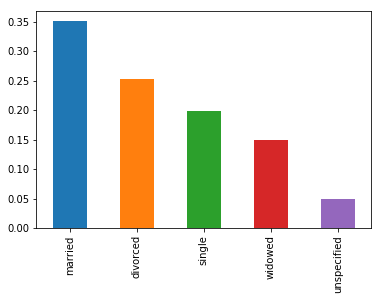

In [110]:
df.marital_status.value_counts(normalize=True).plot(kind='bar')

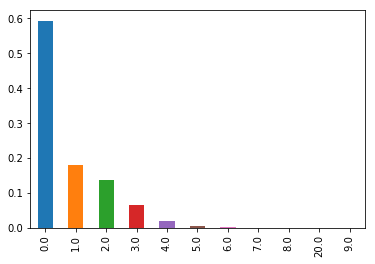

In [111]:
df.nb_dependents.value_counts(normalize=True).plot(kind='bar')

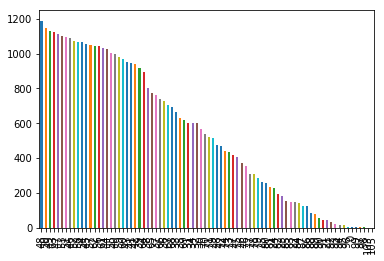

In [112]:
# the age attribute has too many unique values
df.age.value_counts().plot(kind='bar')

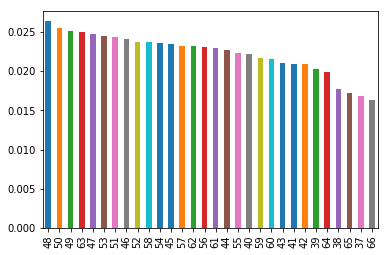

In [113]:
df.age.value_counts(normalize=True).head(n=30).plot(kind='bar')

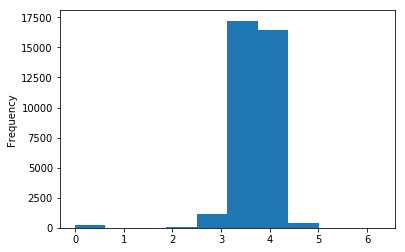

In [114]:
# Histogram of the log of monthly income
mask = df.monthly_income>0
pd.Series(np.log10(df.monthly_income[mask])).plot(kind='hist')

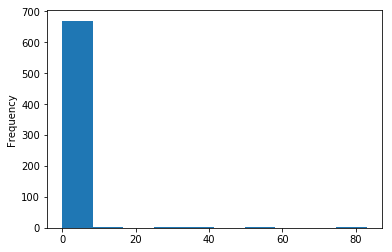

In [115]:
mask = df.monthly_income<100
df.monthly_income[mask].plot(kind='hist')

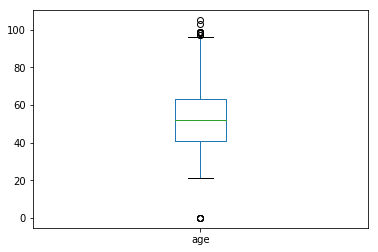

In [116]:
# Boxplot of the age column in our data frame
df.age.plot(kind='box')

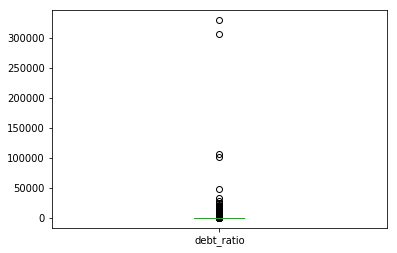

In [117]:
# NOT VERY HELPFUL BECAUSE DISTRIBUTION HAS A HEAVY RIGHT TAIL
df.debt_ratio.plot(kind='box')

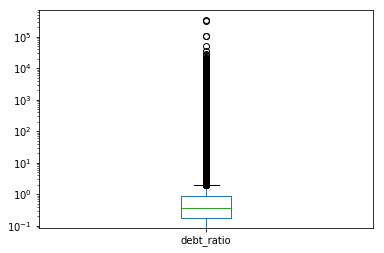

In [118]:
df.debt_ratio.plot(kind='box', logy=True)

In [119]:
print((df.debt_ratio==0).sum())
print(((df.debt_ratio<=1) & (df.debt_ratio>0)).sum())
print((df.debt_ratio>1).sum())

1195
33158
10647


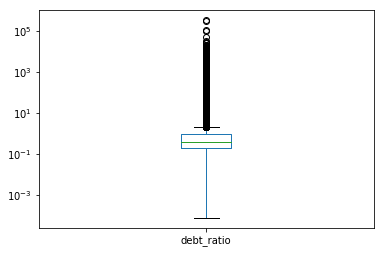

In [120]:
mask = (df.debt_ratio>0)
df.debt_ratio[mask].plot(kind='box', logy=True)

In [121]:
df.debt_ratio[mask].describe()

count     43805.000000
mean        376.101856
std        2537.552354
min           0.000075
25%           0.191862
50%           0.379770
75%           0.946018
max      329664.000000
Name: debt_ratio, dtype: float64

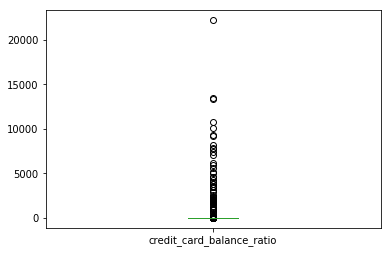

In [122]:
# NOT VERY HELPFUL BECAUSE THIS DISTRIBUTION IS VERY SKEWED
df.credit_card_balance_ratio.plot(kind='box')

### Explore Missing Values


In [123]:
df['monthly_income'].isna().describe()

count     45000
unique        2
top       False
freq      35980
Name: monthly_income, dtype: object

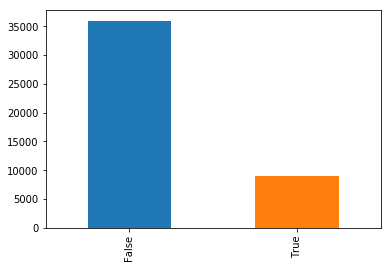

In [124]:
df['monthly_income'].isna().value_counts().plot(kind='bar')

In [125]:
# a simpler/shorter way for doing the same thing as previous cell
L = [(col,(df[col].isna()==True).sum()) for col in df.columns]   #construct a list of (key,value) pairs
L

[('ID', 0),
 ('age', 0),
 ('age_group', 0),
 ('credit_card_balance_ratio', 0),
 ('debt_ratio', 0),
 ('defaulted', 0),
 ('gender', 0),
 ('marital_status', 0),
 ('monthly_income', 9020),
 ('nb_dependents', 1156),
 ('nb_late_payments_1month', 0),
 ('nb_late_payments_2months', 0),
 ('nb_late_payments_3+months', 0),
 ('nb_open_loans', 0),
 ('nb_special_loans', 0)]

In [126]:
#display result as a data frame
pd.DataFrame(data=L, columns = ['Variable','Number of missing values'])

,Variable,Number of missing values
0,ID,0
1,age,0
2,age_group,0
3,credit_card_balance_ratio,0
4,debt_ratio,0
5,defaulted,0
6,gender,0
7,marital_status,0
8,monthly_income,9020
9,nb_dependents,1156


### Explore Strange Values

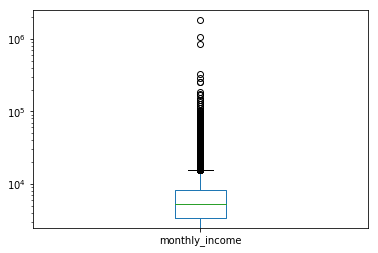

In [127]:
df.monthly_income.plot(kind='box', logy=True)

In [128]:
mask = df.monthly_income<100
mask.sum()

679

In [129]:
df.monthly_income[mask].describe()

count    679.000000
mean       0.798233
std        4.948013
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max       83.000000
Name: monthly_income, dtype: float64

In [130]:
df.monthly_income[df.monthly_income<100].value_counts()

0.0     469
1.0     195
2.0       3
40.0      2
10.0      2
50.0      1
56.0      1
7.0       1
9.0       1
83.0      1
27.0      1
5.0       1
4.0       1
Name: monthly_income, dtype: int64

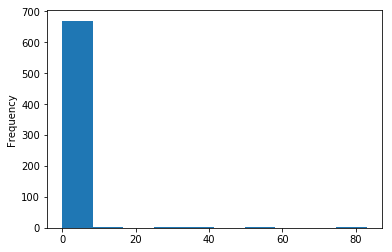

In [131]:
df.monthly_income[mask].plot(kind='hist')

In [132]:
df.monthly_income[df.monthly_income>500].describe()

count    3.513400e+04
mean     6.834465e+03
std      1.371431e+04
min      5.010000e+02
25%      3.500000e+03
50%      5.464000e+03
75%      8.322750e+03
max      1.794060e+06
Name: monthly_income, dtype: float64

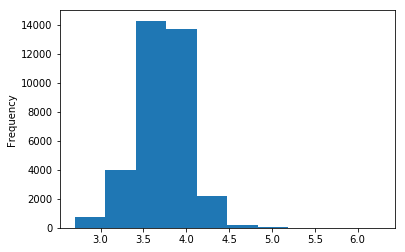

In [133]:
pd.Series(np.log10(df.monthly_income[df.monthly_income>500])).plot(kind='hist')

In [134]:
df.nb_open_loans.describe()

count    45000.000000
mean         8.436133
std          5.131408
min          0.000000
25%          5.000000
50%          8.000000
75%         11.000000
max         52.000000
Name: nb_open_loans, dtype: float64

In [135]:
df.nb_open_loans.nunique()

49

In [136]:
df.nb_open_loans.value_counts().head()

6    4071
5    3966
7    3945
8    3679
4    3484
Name: nb_open_loans, dtype: int64

In [137]:
df.nb_open_loans.value_counts().tail()

39    2
42    1
52    1
50    1
43    1
Name: nb_open_loans, dtype: int64

In [138]:
df.nb_special_loans.nunique()

22

In [139]:
df.nb_special_loans.describe()

count    45000.000000
mean         1.024778
std          1.124936
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max         25.000000
Name: nb_special_loans, dtype: float64

In [140]:
df.nb_special_loans.value_counts()

0     16798
1     15657
2      9481
3      1922
4       694
5       207
6        91
7        43
8        37
9        30
10       13
11        8
12        4
13        4
14        4
21        1
15        1
16        1
17        1
18        1
20        1
25        1
Name: nb_special_loans, dtype: int64

In [141]:
df['nb_late_payments_3+months'].describe()

count    45000.000000
mean         0.261356
std          4.076032
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         98.000000
Name: nb_late_payments_3+months, dtype: float64

In [142]:
df['nb_late_payments_3+months'].nunique()

17

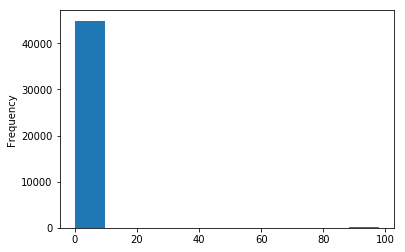

In [143]:
# NOT VERY USEFUL BECAUSE DISTRIBUTION IS VERY SKEWED
df['nb_late_payments_3+months'].plot(kind='hist')

In [144]:
df['nb_late_payments_3+months'].nunique()

17

In [145]:
df['nb_late_payments_3+months'].unique()

array([ 0,  1,  4,  2,  3, 98,  5,  9,  6,  7,  8, 13, 12, 10, 14, 96, 11])

In [146]:
df['nb_late_payments_3+months'].value_counts()

0     42435
1      1598
2       493
3       212
4        93
98       76
6        29
5        25
7        16
9         7
8         6
10        4
13        2
11        1
12        1
96        1
14        1
Name: nb_late_payments_3+months, dtype: int64

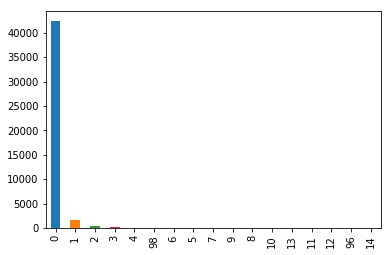

In [147]:
df['nb_late_payments_3+months'].value_counts().plot(kind='bar')

In [148]:
df['nb_late_payments_3+months'].value_counts().head(7)

0     42435
1      1598
2       493
3       212
4        93
98       76
6        29
Name: nb_late_payments_3+months, dtype: int64

In [149]:
df['nb_late_payments_3+months'].value_counts().tail()

13    2
11    1
12    1
96    1
14    1
Name: nb_late_payments_3+months, dtype: int64

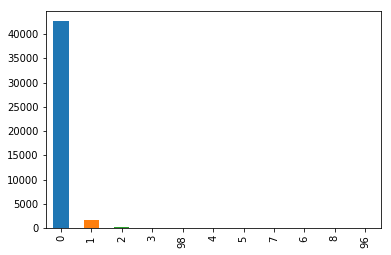

In [150]:
df['nb_late_payments_2months'].value_counts().plot(kind='bar')

In [151]:
df['nb_late_payments_2months'].value_counts().tail()

5     9
7     2
6     2
8     1
96    1
Name: nb_late_payments_2months, dtype: int64

### Explore relationship between 2 attributes
This is useful for detecting *irrelevant* and *redundant* attributes.

- **two categorical** or **two discrete** attributes: 1) *contingency table*, i..e a table containing frequency of occurrence of each pair of values in the dataset. In Python we can obtain this table using ``pd.crosstab`` function. 2) stacked barplot.
- **two numeric** attributes:
1) use ``corr`` function to calculate their *linear correlation coefficient*. 2) visualize their joint distribution with a *scatterplot*.
- **categorical** attribute and **numeric** attribute: 
1) multiple boxplots of the numeric attribute, one boxplot for each unique value of categorical attribute. 2) same thing but with histograms instead of boxplots.

In [152]:
df.corr()

,ID,age,credit_card_balance_ratio,debt_ratio,defaulted,monthly_income,nb_dependents,nb_late_payments_1month,nb_late_payments_2months,nb_late_payments_3+months,nb_open_loans,nb_special_loans
ID,1.000000,0.003556,-0.002816,-0.002751,0.004504,0.009053,0.004712,0.011903,0.010153,0.010790,0.002268,-0.002968
age,0.003556,1.000000,-0.009657,0.022994,-0.116388,0.042746,-0.212792,-0.067626,-0.062725,-0.067223,0.153980,0.034967
credit_card_balance_ratio,-0.002816,-0.009657,1.000000,0.000669,-0.001108,0.002954,0.005546,-0.002310,-0.001153,-0.001406,-0.013311,0.004651
debt_ratio,-0.002751,0.022994,0.000669,1.000000,-0.008636,-0.030381,-0.031952,-0.004643,-0.006110,-0.007066,0.045524,0.108934
defaulted,0.004504,-0.116388,-0.001108,-0.008636,1.000000,-0.020094,0.048143,0.125883,0.101213,0.116551,-0.022580,-0.015402
monthly_income,0.009053,0.042746,0.002954,-0.030381,-0.020094,1.000000,0.053809,-0.010518,-0.012140,-0.014056,0.101184,0.139091
nb_dependents,0.004712,-0.212792,0.005546,-0.031952,0.048143,0.053809,1.000000,-0.004822,-0.013345,-0.012188,0.058281,0.116096
nb_late_payments_1month,0.011903,-0.067626,-0.002310,-0.004643,0.125883,-0.010518,-0.004822,1.000000,0.986042,0.982265,-0.052295,-0.028583
nb_late_payments_2months,0.010153,-0.062725,-0.001153,-0.006110,0.101213,-0.012140,-0.013345,0.986042,1.000000,0.992195,-0.070165,-0.040036
nb_late_payments_3+months,0.010790,-0.067223,-0.001406,-0.007066,0.116551,-0.014056,-0.012188,0.982265,0.992195,1.000000,-0.079117,-0.045681


In [153]:
pd.crosstab(df.defaulted,df.nb_dependents)

nb_dependents,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,20.0
defaulted,,,,,,,,,,,
0,24567,7261,5487,2558,772,213,45,17,8,1,1
1,1471,599,472,258,92,15,4,3,0,0,0


In [154]:
# crosstab is not very useful when one of the variables has too many values
pd.crosstab(df.defaulted,df.age)

age,0,21,22,23,24,25,26,27,28,29,...,92,93,94,95,96,97,98,99,103,105
defaulted,,,,,,,,,,,,,,,,,,,,,
0,4,41,138,162,199,221,324,369,419,463,...,31,23,15,14,5,2,2,3,1,1
1,1,1,11,20,29,43,50,47,59,53,...,0,0,1,1,0,0,0,1,0,0


## Task 3: Clean the data


In [155]:
df9 = df[(df.age == 0)]
df9.shape
print((df[df.age == 0].shape[0])/45000)


# for the attribute age, the number of invalid attributes is equal to 5

0.00011111111111111112


In [156]:
df10 = df[((df.nb_late_payments_2months == 98) | (df.nb_late_payments_2months == 96))]
print(df10.shape)
print((df10.shape[0]/45000))
# the number of invalid attributes in the original dataframe is 77 instances.

(77, 15)
0.0017111111111111112


In [157]:
#for the monthly_income the number of missing values is 9020
print(df[df.monthly_income.isna()==True].shape[0])
print((df[df.monthly_income.isna()==True].shape[0]/45000))



9020
0.20044444444444445


In [158]:
# for the nb_dependents attribute
print(df[df.nb_dependents.isna()==True].shape[0])
print((df[df.nb_dependents.isna()==True].shape[0]/45000))

1156
0.02568888888888889


In [159]:
# Replace all invalid and missing vlaues with the mean value of the corresponding attribute.
df[df.monthly_income.isna()==True].monthly_income
df.monthly_income=df.monthly_income.fillna(df.monthly_income.describe()[1]) #Replacing by the mean 



In [160]:
print(df[df.monthly_income.isna()==True].shape[0])
print((df[df.monthly_income.isna()==True].shape[0]/45000))
# There are no more missing values.

0
0.0


In [161]:
df.nb_dependents=df.nb_dependents.fillna(df.nb_dependents.describe()[1])


In [162]:
print(df[df.monthly_income.isna()==True].shape[0])
print((df[df.monthly_income.isna()==True].shape[0]/45000))
#There are no more missing values in the monthly_income attribute

0
0.0


In [163]:
# Age attribute and ID are irrelenat to the task
del df['age']
del df['ID']
df

,age_group,credit_card_balance_ratio,debt_ratio,defaulted,gender,marital_status,monthly_income,nb_dependents,nb_late_payments_1month,nb_late_payments_2months,nb_late_payments_3+months,nb_open_loans,nb_special_loans
0,middle_aged,0.011639,0.053386,1,Male,married,3558.000000,2.0,0,0,0,5,0
1,young,0.031554,0.032146,0,Female,single,6625.000000,0.0,0,0,0,3,0
2,senior,1.000000,1.000000,0,Male,divorced,6675.478043,0.0,0,0,0,4,0
3,young,0.006666,4.000000,0,Male,married,6675.478043,0.0,0,0,0,2,0
4,young,0.097509,68.000000,0,Female,married,6675.478043,0.0,0,0,0,7,0
5,young,0.067539,0.197960,0,Male,married,5000.000000,0.0,0,0,0,5,1
6,middle_aged,0.679592,0.609742,0,Male,married,3530.000000,1.0,0,0,0,8,2
7,young,0.118976,0.034655,0,Male,married,3000.000000,0.0,0,0,0,4,0
8,senior,0.641684,0.950050,0,Female,single,1000.000000,0.0,1,0,0,6,0
9,middle_aged,0.041342,0.371101,0,Male,divorced,3750.000000,0.0,0,0,0,12,0


In [164]:
df.to_csv("bankloans-data-clean.csv")